In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

#LOADING THE DATASET

In [ ]:
train_df=pd.read_csv('/content/train_loan_approval_dataset.csv')
test_df=pd.read_csv('/content/test_loan_approval_dataset.csv')


#PREPROCESSING THE DATASET

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from graphviz import Digraph

In [ ]:
# Save loan_ids before dropping
loan_ids_test = test_df['loan_id']
train_df.drop(columns=['loan_id'], inplace=True)
test_df.drop(columns=['loan_id'], inplace=True)

# Rename columns
train_df.rename(columns=lambda X: X.strip(), inplace=True)
test_df.rename(columns=lambda X: X.strip(), inplace=True)

# Combine train and test data for label encoding
combined_df = pd.concat([train_df, test_df])

# Label encoding
label_encoder = LabelEncoder()
combined_df['education'] = label_encoder.fit_transform(combined_df['education'])
combined_df['self_employed'] = label_encoder.fit_transform(combined_df['self_employed'])
combined_df['loan_status'] = label_encoder.fit_transform(combined_df['loan_status'])

# Split the combined data back into train and test sets
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Define features and target
X_train = train_df.drop(columns=['loan_status'])
y_train = train_df['loan_status']
X_test = test_df.drop(columns=['loan_status'])
y_test = test_df['loan_status']


# Save the column names
feature_names = X_train.columns


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#PREDICTION USING BASIC MODELS


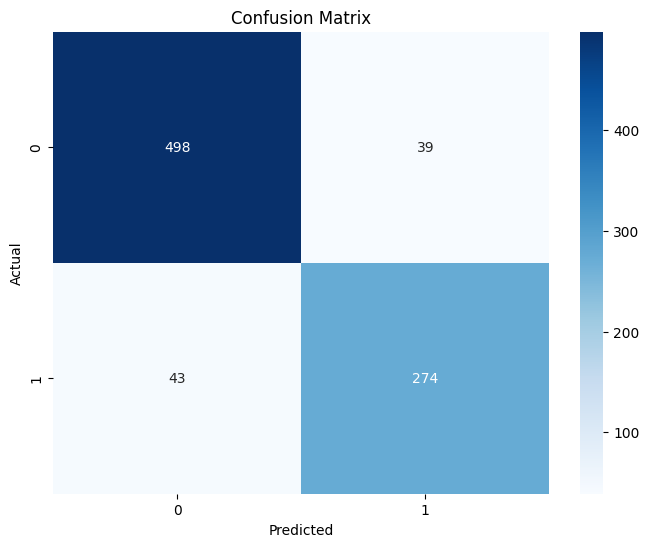

Accuracy: 0.9039812646370023
Precision: 0.9037699381777444
Recall: 0.9039812646370023
F1 Score: 0.9038545856210628
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       537
           1       0.88      0.86      0.87       317

    accuracy                           0.90       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.90      0.90       854



In [ ]:
#LOGISTIC REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a LogisticRegression instance
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)


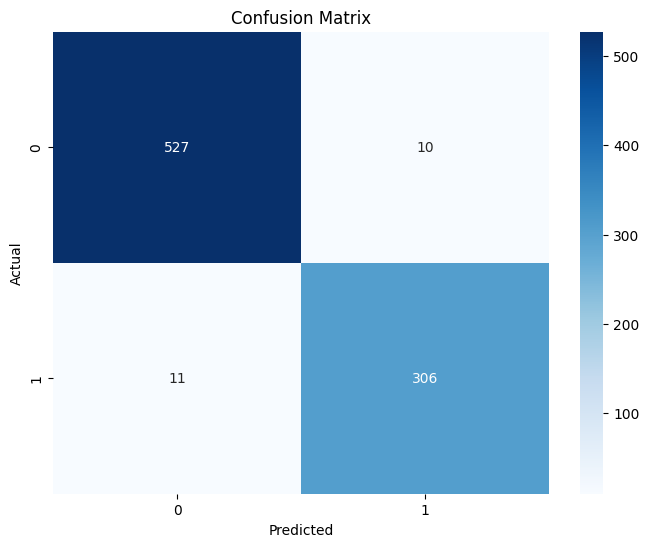

Decision Tree Classifier Metrics:
Accuracy: 0.9754098360655737
Precision: 0.9753967219286114
Recall: 0.9754098360655737
F1 Score: 0.975401849840908
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       537
           1       0.97      0.97      0.97       317

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DecisionTreeClassifier instance
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [ ]:
!pip install shap
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3ad75f6aac5403e30d8c04f577ad94339c738cbdddbdd620c93ba257916258c9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import shap
explainer = shap.Explainer(decision_tree.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 855it [00:43, 17.42it/s]                         


In [ ]:
print(shap_values)

.values =
array([[ 0.0002381 ,  0.        ,  0.        , ..., -0.00095238,
        -0.00904762,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00214286,
        -0.00238095,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00047619,
         0.01333333,  0.        ],
       ...,
       [ 0.00142857,  0.        ,  0.        , ..., -0.00047619,
        -0.01142857,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -0.00047619,
        -0.00452381, -0.00071429],
       [ 0.00380952,  0.        ,  0.        , ..., -0.00619048,
        -0.00619048, -0.00047619]])

.base_values =
array([0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
       0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
       0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
       0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
       0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.

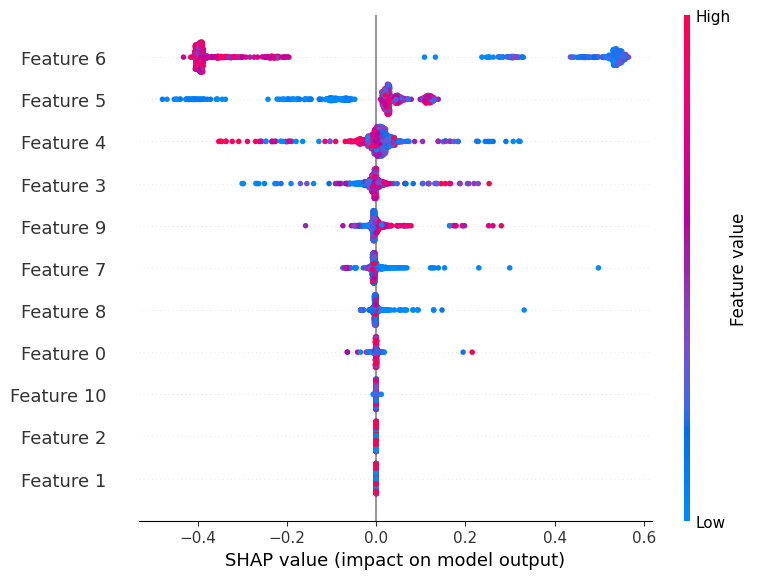

In [ ]:
shap.summary_plot(shap_values)

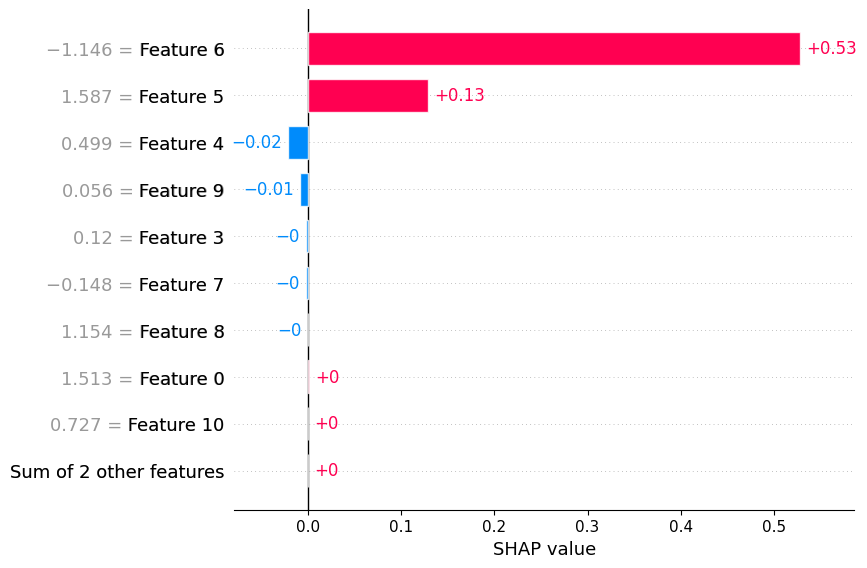

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Approved: 0, Rejected: 1)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# If X_train is a numpy array, no need to use .values
# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   mode='classification',
                                                   training_labels=y_train,
                                                   feature_names=feature_names,  # Use a list of feature names if it's a numpy array
                                                   class_names=['Approved', 'Rejected'])

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 612
instance = X_test[instance_idx]

# Generate LIME explanations
exp = explainer.explain_instance(instance, decision_tree.predict_proba, num_features=len(feature_names))

# Visualize the LIME explanations
exp.show_in_notebook()

# Optionally, you can print the feature weights as well
print("LIME Feature Importance:")
for feature, weight in exp.as_list():
    print(feature, weight)


LIME Feature Importance:
cibil_score <= -0.85 0.6192007604395091
-0.86 < loan_term <= -0.16 0.10061570102293013
loan_amount > 0.69 -0.04642311157359684
luxury_assets_value > 0.72 0.032242098592661216
income_annum > 0.87 -0.021695966683513854
commercial_assets_value > 0.59 -0.020250840107070907
no_of_dependents <= -0.85 0.01262518237050257
residential_assets_value > 0.57 -0.011579935922588063
-0.14 < bank_asset_value <= 0.63 0.005630620006134638
self_employed <= -1.02 0.00508462606637481
-1.00 < education <= 1.00 0.003721839294594427


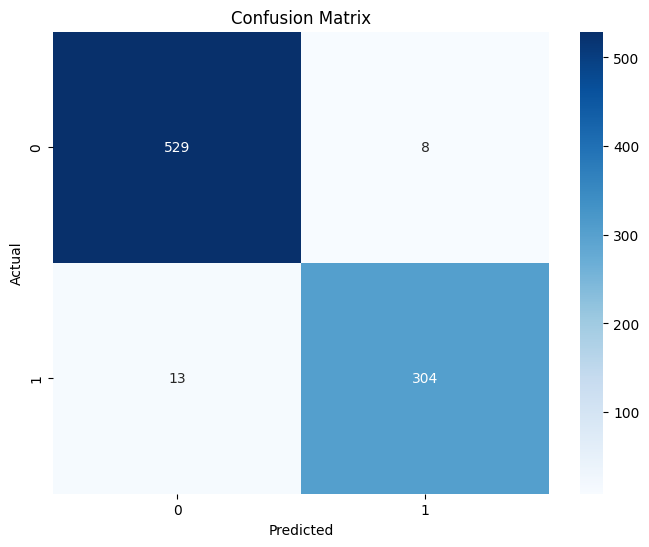

Random Forest Classifier Metrics:
Accuracy: 0.9754098360655737
Precision: 0.9754001417693874
Recall: 0.9754098360655737
F1 Score: 0.975369075344677
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       537
           1       0.97      0.96      0.97       317

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Train the random forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [ ]:
import shap
explainer = shap.Explainer(random_forest.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

PermutationExplainer explainer: 855it [07:54,  1.78it/s]


In [ ]:
print(shap_values)

.values =
array([[-0.00333333,  0.00047619, -0.0002381 , ...,  0.00238095,
         0.00047619,  0.00214286],
       [ 0.0002381 ,  0.00047619,  0.        , ...,  0.00119048,
         0.00071429,  0.0002381 ],
       [-0.00166667, -0.00071429, -0.00119048, ...,  0.00595238,
         0.0102381 ,  0.0097619 ],
       ...,
       [-0.00452381, -0.00238095, -0.00095238, ...,  0.0002381 ,
        -0.00190476,  0.00904762],
       [-0.00357143,  0.0002381 , -0.00047619, ..., -0.00166667,
        -0.00880952, -0.0147619 ],
       [-0.0002381 , -0.00119048,  0.00380952, ..., -0.0052381 ,
        -0.00142857, -0.0147619 ]])

.base_values =
array([0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39,
       0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.39, 0.

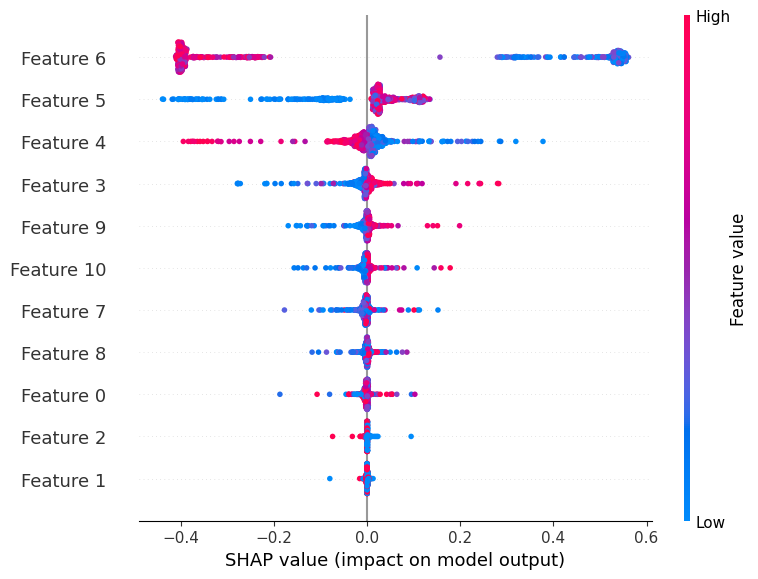

In [ ]:
shap.summary_plot(shap_values)

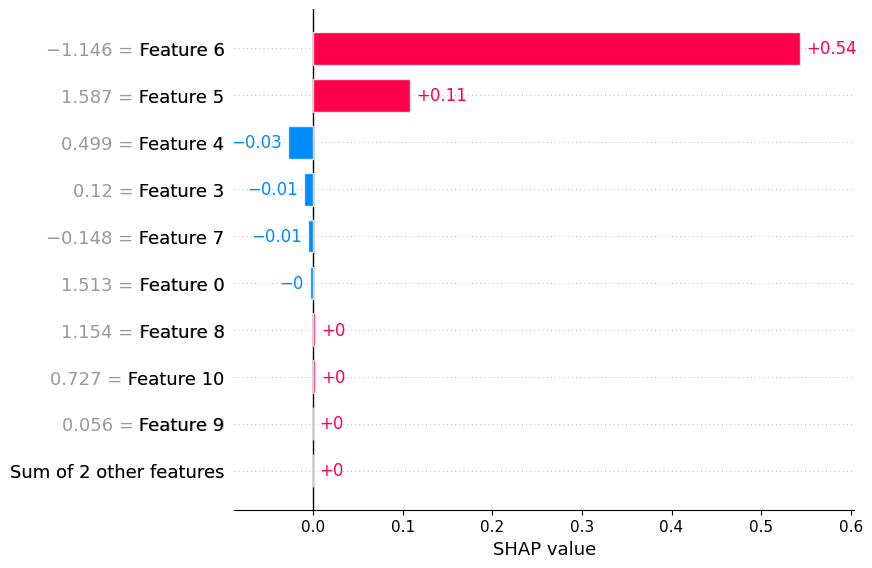

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Approved: 0, Rejected: 1)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# If X_train is a numpy array, no need to use .values
# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   mode='classification',
                                                   training_labels=y_train,
                                                   feature_names=feature_names,  # Use a list of feature names if it's a numpy array
                                                   class_names=['Approved', 'Rejected'])

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 612
instance = X_test[instance_idx]

# Generate LIME explanations
exp = explainer.explain_instance(instance, random_forest.predict_proba, num_features=len(feature_names))

# Visualize the LIME explanations
exp.show_in_notebook()

# Optionally, you can print the feature weights as well
print("LIME Feature Importance:")
for feature, weight in exp.as_list():
    print(feature, weight)


LIME Feature Importance:
cibil_score <= -0.85 0.6022605535251027
-0.86 < loan_term <= -0.16 0.06011574265489926
loan_amount > 0.69 -0.05514134636398453
income_annum > 0.87 0.018135414268798805
commercial_assets_value > 0.59 -0.018041684718658656
residential_assets_value > 0.57 -0.010155231467963509
-0.14 < bank_asset_value <= 0.63 0.007329361616026015
no_of_dependents <= -0.85 -0.005981442328054525
self_employed <= -1.02 0.00587622964159977
-1.00 < education <= 1.00 -0.0019338020767045746
luxury_assets_value > 0.72 0.0014180009172408325


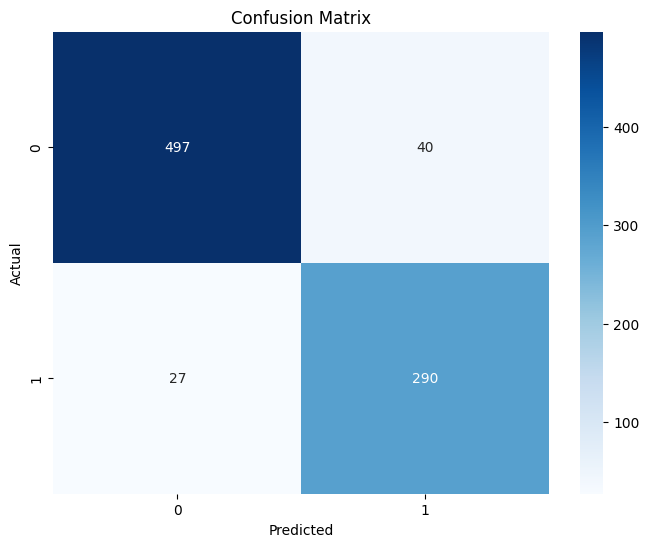

SVM Classifier Metrics:
Accuracy: 0.9215456674473068
Precision: 0.9226064522804605
Recall: 0.9215456674473068
F1 Score: 0.9218532140721253
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       537
           1       0.88      0.91      0.90       317

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



In [ ]:
#SVC

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an SVC (Support Vector Classification) instance
svm_classifier = SVC(random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("SVM Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

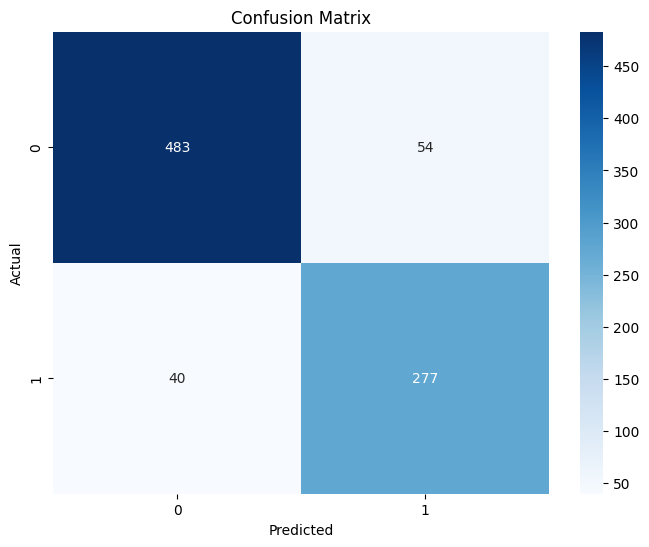

K-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8899297423887588
Precision: 0.891350400723081
Recall: 0.8899297423887588
F1 Score: 0.8903918938896771
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       537
           1       0.84      0.87      0.85       317

    accuracy                           0.89       854
   macro avg       0.88      0.89      0.88       854
weighted avg       0.89      0.89      0.89       854



In [ ]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNeighborsClassifier instance with a specified number of neighbors (e.g., n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("K-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

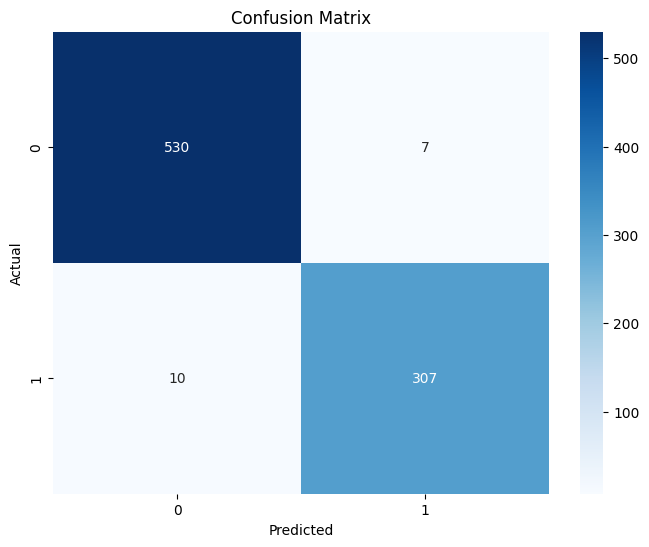

XGBoost Classifier Metrics:
Accuracy: 0.9800936768149883
Precision: 0.9800804175347352
Recall: 0.9800936768149883
F1 Score: 0.9800740806040384
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       537
           1       0.98      0.97      0.97       317

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
#XGBOOST


from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBClassifier instance
xgb_classifier = XGBClassifier(random_state=42)

# Train the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)

In [ ]:
import shap
explainer = shap.Explainer(xgb_classifier, X_test, feature_names=feature_names)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

In [ ]:
print(shap_values)

.values =
array([[ 0.03935286,  0.02547163,  0.0754835 , ...,  0.1499734 ,
        -0.01744778,  0.14953019],
       [-0.02900343,  0.0220404 ,  0.03889781, ..., -0.18408379,
        -0.08776269,  0.06353016],
       [-0.11306484,  0.02187869,  0.19774562, ...,  0.12423613,
         0.16682048,  0.16777146],
       ...,
       [ 0.03539612, -0.03045851, -0.02468257, ..., -0.32772685,
        -0.30076735,  0.1060884 ],
       [-0.05381555, -0.00443295,  0.07470639, ...,  0.19272521,
         0.31373215, -0.15443639],
       [ 0.12483724, -0.08979512,  0.06971557, ..., -0.56598507,
         0.18490075, -0.51135832]])

.base_values =
array([-2.17517851, -2.17517851, -2.17517851, -2.17517851, -2.17517851,
       -2.17517851, -2.17517851, -2.17517851, -2.17517851, -2.17517851,
       -2.17517851, -2.17517851, -2.17517851, -2.17517851, -2.17517851,
       -2.17517851, -2.17517851, -2.17517851, -2.17517851, -2.17517851,
       -2.17517851, -2.17517851, -2.17517851, -2.17517851, -2.17517851,
 

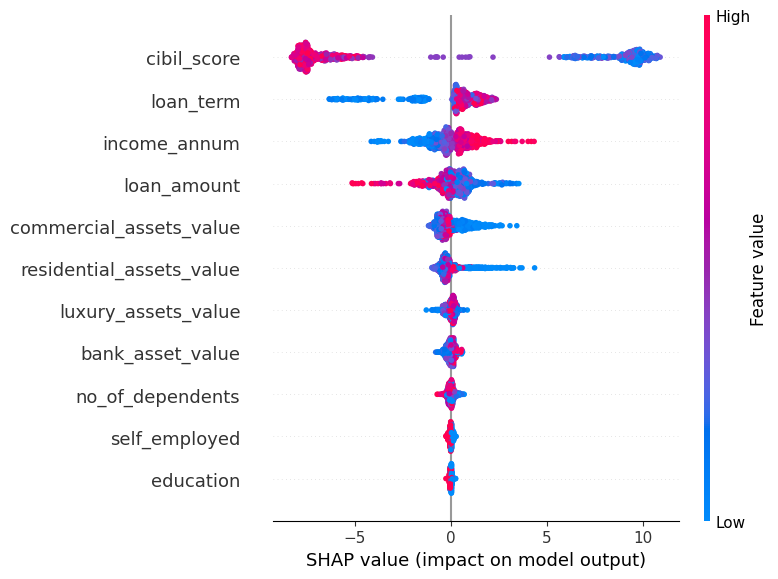

In [ ]:
# Plotting the summary plot with proper feature names
shap.summary_plot(shap_values, feature_names=feature_names)

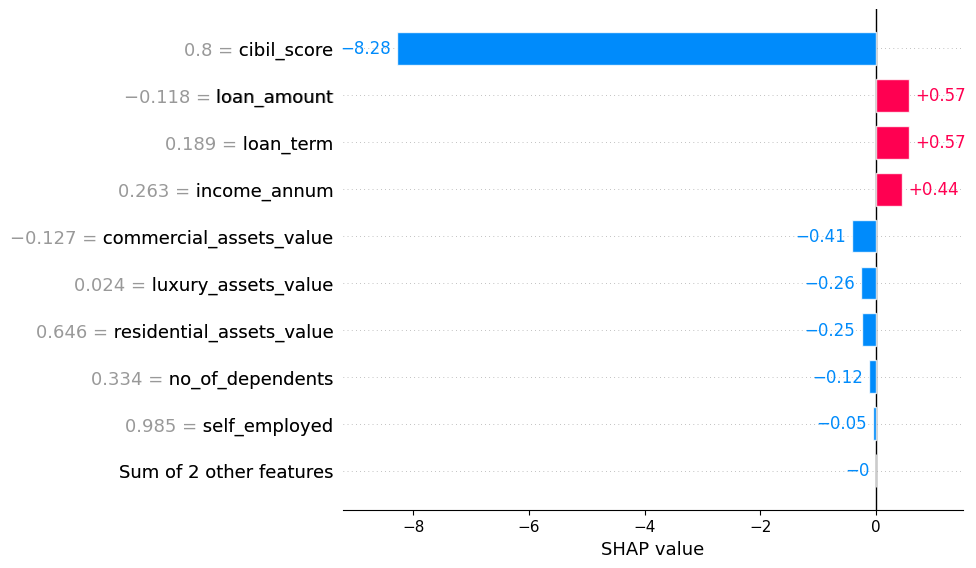

In [ ]:
shap.plots.bar(shap_values[4])

In [ ]:
import lime
import lime.lime_tabular
from sklearn.preprocessing import LabelEncoder

# Encode target variable (Approved: 0, Rejected: 1)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

# If X_train is a numpy array, no need to use .values
# Initialize LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   mode='classification',
                                                   training_labels=y_train,
                                                   feature_names=feature_names,  # Use a list of feature names if it's a numpy array
                                                   class_names=['Approved', 'Rejected'])

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 320
instance = X_test[instance_idx]

# Generate LIME explanations
exp = explainer.explain_instance(instance, xgb_classifier.predict_proba, num_features=len(feature_names))

# Visualize the LIME explanations
exp.show_in_notebook()

# Optionally, you can print the feature weights as well
print("LIME Feature Importance:")
for feature, weight in exp.as_list():
    print(feature, weight)



LIME Feature Importance:
cibil_score > 0.86 -0.47707383315249824
-0.16 < loan_term <= 0.89 0.08984041541054896
loan_amount > 0.69 -0.07528384094147397
0.01 < income_annum <= 0.87 0.017070233426818546
residential_assets_value > 0.57 0.013479034298133652
education <= -1.00 -0.011826229311336612
-0.29 < commercial_assets_value <= 0.59 0.00975139754851101
-0.14 < bank_asset_value <= 0.63 -0.009393685323086357
luxury_assets_value > 0.72 0.0038536732272530885
no_of_dependents > 0.92 -0.0013559601087429415
-1.02 < self_employed <= 0.99 -0.00023394184704634172


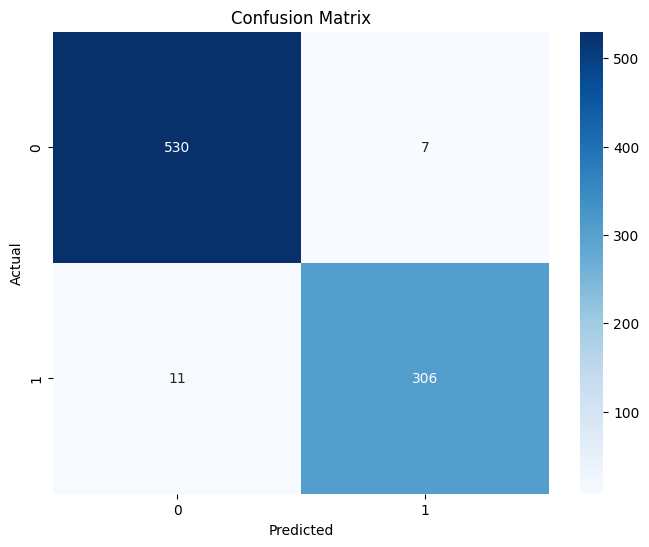

Ensemble Classifier Metrics:
Accuracy: 0.9789227166276346
Precision: 0.9789132014048618
Recall: 0.9789227166276346
F1 Score: 0.9788949090387699
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       537
           1       0.98      0.97      0.97       317

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
#ENSEMBLE

from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgb_classifier = XGBClassifier(random_state=42)

# Create an ensemble of classifiers using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print evaluation metrics separately
print("Ensemble Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Print the classification report
print("Classification Report:\n", classification_rep)